# <center>Incidence du syndrome grippal

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Nous recuperons les données sur le site via le site en pointant sur un fichier au format .csv Pour la lecture des données ....

In [35]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data.head()

week  indicator    inc  inc_low   inc_up  inc100  inc100_low  inc100_up  \
0  202052          3  18546  13789.0  23303.0      28        21.0       35.0   
1  202051          3  21032  16856.0  25208.0      32        26.0       38.0   
2  202050          3  16845  13220.0  20470.0      26        20.0       32.0   
3  202049          3  12939   9923.0  15955.0      20        15.0       25.0   
4  202048          3  13804  10641.0  16967.0      21        16.0       26.0   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [36]:
raw_data.tail()
#raw_data.columns

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
1882  198448          3   78620   60634.0   96606.0     143       110.0   
1883  198447          3   72029   54274.0   89784.0     131        99.0   
1884  198446          3   87330   67686.0  106974.0     159       123.0   
1885  198445          3  135223  101414.0  169032.0     246       184.0   
1886  198444          3   68422   20056.0  116788.0     125        37.0   

      inc100_up geo_insee geo_name  
1882      176.0        FR   France  
1883      163.0        FR   France  
1884      195.0        FR   France  
1885      308.0        FR   France  
1886      213.0        FR   France

On fait une recherche de donnée manquante dans la dataframe.On visuallise les lignes de donnée manquantes

In [37]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1650  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1650        FR   France

Nous travaillerons sur une dataframe dont les lignes manquantes seront supprimées, nous testons que sur cette nouvelle dataframe il y a bien aucun elements manquant sur une ligne;

In [42]:
data = raw_data.dropna().copy()
data.head()

week  indicator    inc  inc_low   inc_up  inc100  inc100_low  inc100_up  \
0  202052          3  18546  13789.0  23303.0      28        21.0       35.0   
1  202051          3  21032  16856.0  25208.0      32        26.0       38.0   
2  202050          3  16845  13220.0  20470.0      26        20.0       32.0   
3  202049          3  12939   9923.0  15955.0      20        15.0       25.0   
4  202048          3  13804  10641.0  16967.0      21        16.0       26.0   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [43]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [52]:
year_and_week_int = 198501
year_and_week_str = str(year_and_week_int)
year = int(year_and_week_str[:4])
week = int(year_and_week_str[4:6])

w = isoweek.Week(year,week)

Premeière jour de cette semaine 1985 01

In [53]:
print(w.day(0))

1984-12-31


In [55]:
pd.Period(w.day(0),'W')

Period('1984-12-31/1985-01-06', 'W-SUN')

In [57]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:6])
    w = isoweek.Week(year,week)
    return pd.Period(w.day(0),'W')

On ajoute une nouvelle colonne dans notre jeux de données, cette collonne represente une pérriode.
On aura notre jeux de données en ordre inverse, nous lui appliquons une fonction de trie pour obtenir un ordre chronologique. 

In [61]:
data['period'] = [convert_week(yw) for yw in data['week']]
data.head()

week  indicator    inc  inc_low   inc_up  inc100  inc100_low  inc100_up  \
0  202052          3  18546  13789.0  23303.0      28        21.0       35.0   
1  202051          3  21032  16856.0  25208.0      32        26.0       38.0   
2  202050          3  16845  13220.0  20470.0      26        20.0       32.0   
3  202049          3  12939   9923.0  15955.0      20        15.0       25.0   
4  202048          3  13804  10641.0  16967.0      21        16.0       26.0   

  geo_insee geo_name                period  
0        FR   France 2020-12-21/2020-12-27  
1        FR   France 2020-12-14/2020-12-20  
2        FR   France 2020-12-07/2020-12-13  
3        FR   France 2020-11-30/2020-12-06  
4        FR   France 2020-11-23/2020-11-29

In [62]:
sorted_data = data.set_index('period').sort_index()

In [63]:
sorted_data.head()

week  indicator     inc   inc_low    inc_up  inc100  \
period                                                                         
1984-10-29/1984-11-04  198444          3   68422   20056.0  116788.0     125   
1984-11-05/1984-11-11  198445          3  135223  101414.0  169032.0     246   
1984-11-12/1984-11-18  198446          3   87330   67686.0  106974.0     159   
1984-11-19/1984-11-25  198447          3   72029   54274.0   89784.0     131   
1984-11-26/1984-12-02  198448          3   78620   60634.0   96606.0     143   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1984-10-29/1984-11-04        37.0      213.0        FR   France  
1984-11-05/1984-11-11       184.0      308.0        FR   France  
1984-11-12/1984-11-18       123.0      195.0        FR   France  
1984-11-19/1984-11-25        99.0      163.0        FR   France  
1984-11-26/1984-12-02       110.0      176.0        FR   France

Verification des données (cohérence des données).
Vérification que chaque période se suivent consecutivement dans un ordre chronologique.

In [77]:
periods = sorted_data.index
periods

PeriodIndex(['1984-10-29/1984-11-04', '1984-11-05/1984-11-11',
             '1984-11-12/1984-11-18', '1984-11-19/1984-11-25',
             '1984-11-26/1984-12-02', '1984-12-03/1984-12-09',
             '1984-12-10/1984-12-16', '1984-12-17/1984-12-23',
             '1984-12-24/1984-12-30', '1984-12-31/1985-01-06',
             ...
             '2020-10-19/2020-10-25', '2020-10-26/2020-11-01',
             '2020-11-02/2020-11-08', '2020-11-09/2020-11-15',
             '2020-11-16/2020-11-22', '2020-11-23/2020-11-29',
             '2020-11-30/2020-12-06', '2020-12-07/2020-12-13',
             '2020-12-14/2020-12-20', '2020-12-21/2020-12-27'],
            dtype='period[W-SUN]', name='period', length=1886, freq='W-SUN')

In [84]:
periods = sorted_data.index
i = 0
for p1, p2 in zip(periods[0:],periods[1:]):
    if i < 5 :
        print(p1, p2)
        i = i + 1
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print()
        print(p1,p2)
        

1984-10-29/1984-11-04 1984-11-05/1984-11-11
1984-11-05/1984-11-11 1984-11-12/1984-11-18
1984-11-12/1984-11-18 1984-11-19/1984-11-25
1984-11-19/1984-11-25 1984-11-26/1984-12-02
1984-11-26/1984-12-02 1984-12-03/1984-12-09

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Nous retrouvons bien la semaine manquante dans le jeux de données (celle que nous avons supprimée)

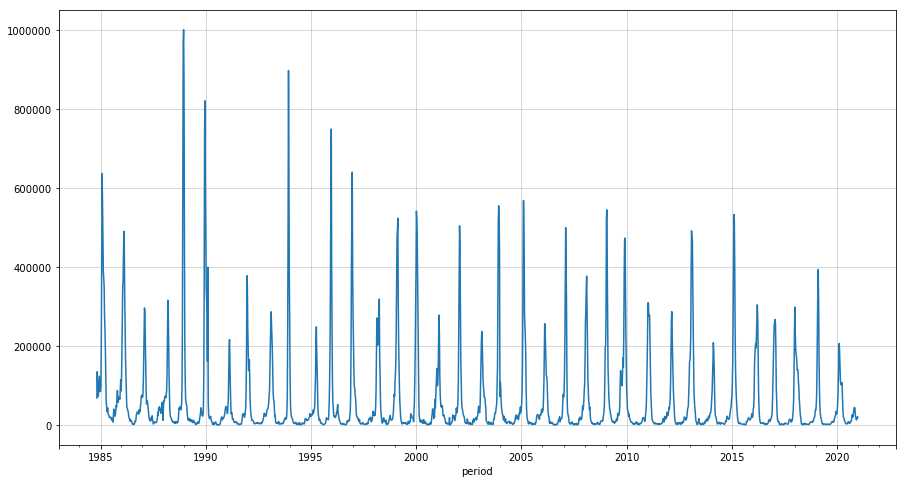

In [96]:
sorted_data['inc'].plot(figsize=(15, 8)).grid(linestyle='-', linewidth=0.5)

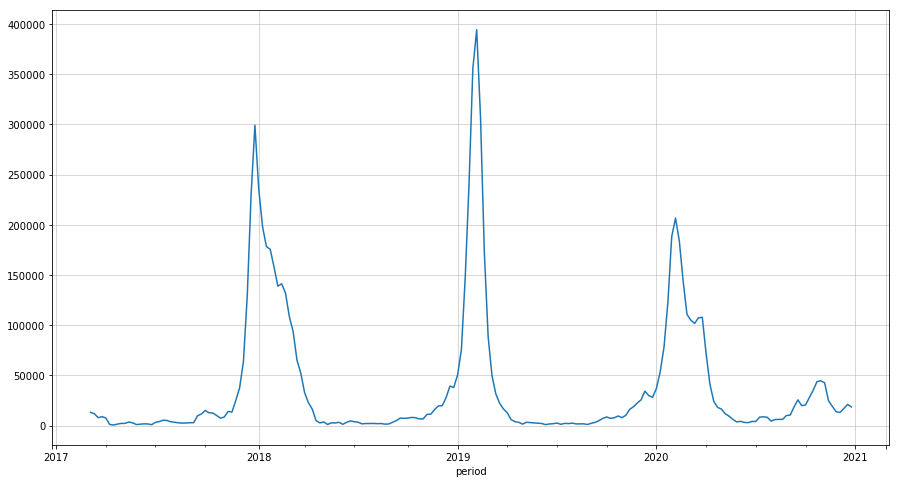

In [98]:
sorted_data['inc'][-200:].plot(figsize=(15, 8)).grid(linestyle='-', linewidth=0.5)